In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [ ]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
y_train_categorical=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test_categorical=tf.keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
y_train_categorical[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
index=0
class_index=np.argmax(y_train_categorical[index])
class_index=np.argmax(y_test_categorical[index])

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    class_index = y[index]  # Get the index of the max probability
    plt.xlabel(classes[class_index])   # Use the class index to access classes

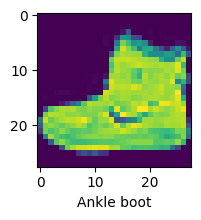

In [ ]:
plot_sample(x_train,y_train,0)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

#want to compile
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train_categorical,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.7262 - loss: 0.8665
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.8380 - loss: 0.4698
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8542 - loss: 0.4182
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8635 - loss: 0.3930
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8721 - loss: 0.3676


In [ ]:
model.evaluate(x_test,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8562 - loss: 0.4011


[0.40905943512916565, 0.8519999980926514]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_predicted=model.predict(x_test)
y_predicted_labels=[np.argmax(i)for i in y_predicted]
print(classification_report(y_test,y_predicted_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.71      0.83      0.76      1000
           3       0.85      0.88      0.86      1000
           4       0.75      0.78      0.76      1000
           5       0.95      0.95      0.95      1000
           6       0.81      0.47      0.59      1000
           7       0.95      0.83      0.89      1000
           8       0.94      0.96      0.95      1000
           9       0.87      0.98      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [ ]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[879,   0,  20,  40,   3,   3,  41,   0,  14,   0],
       [  5, 965,   2,  22,   3,   0,   1,   0,   2,   0],
       [ 26,   2, 826,  11, 109,   1,  19,   0,   6,   0],
       [ 38,  13,  16, 881,  29,   0,  18,   0,   5,   0],
       [  0,   0, 137,  42, 782,   1,  31,   0,   7,   0],
       [  0,   0,   0,   1,   0, 949,   0,  25,   2,  23],
       [207,   1, 148,  37, 117,   0, 467,   0,  23,   0],
       [  0,   0,   0,   0,   0,  40,   0, 832,   0, 128],
       [  3,   1,  12,   8,   6,   3,   2,   5, 959,   1],
       [  0,   0,   0,   0,   0,   6,   0,  13,   1, 980]], dtype=int32)>

In [ ]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

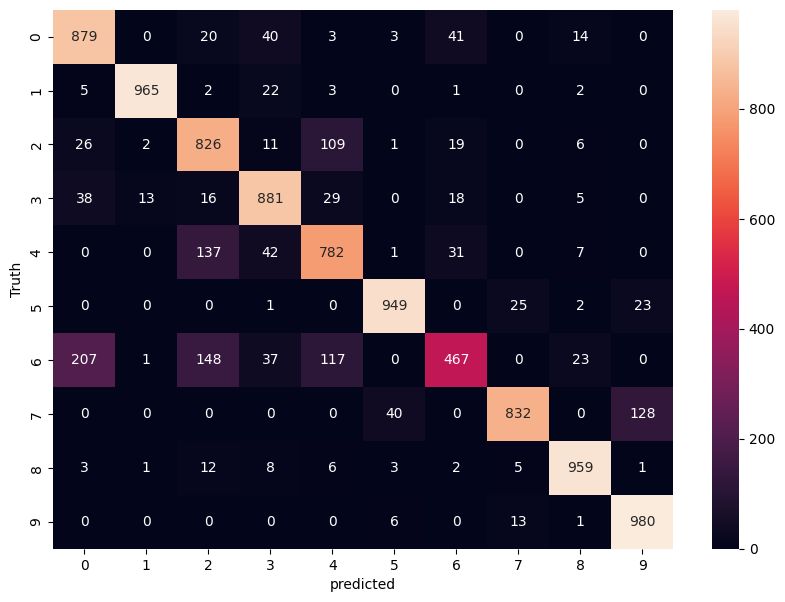

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
#cnn
#cnn
#dense
cnn_model=tf.keras.Sequential([
    keras.layers.Conv2D(filters=28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
cnn_model.fit(x_train,y_train_categorical,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.7643 - loss: 0.6442
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8806 - loss: 0.3308
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8972 - loss: 0.2806
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9112 - loss: 0.2426
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9211 - loss: 0.2111
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9297 - loss: 0.1911
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9366 - loss: 0.1696
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9424 - loss: 0.1527
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9481 - loss: 0.1394
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9532 - loss: 0.1257


In [ ]:
cnn_model.evaluate(x_test,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9045 - loss: 0.2849


[0.2716622054576874, 0.9092000126838684]

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    class_index = y[index] # Get the index of the max probability
    plt.xlabel(classes[class_index])   # Use the class index to access classes

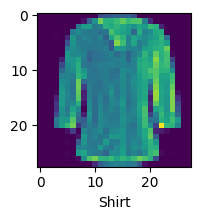

In [ ]:
plot_sample(x_test,y_test,4)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_predicted=cnn_model.predict(x_test)
y_predicted[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[1.4025018e-11, 4.1004674e-15, 1.6509072e-10, 5.1136356e-12,
        7.6350888e-17, 8.7576660e-07, 3.2991985e-13, 3.0019447e-07,
        7.7868721e-15, 9.9999875e-01],
       [1.4530175e-07, 6.3507684e-13, 9.9999541e-01, 2.5210492e-13,
        1.8965990e-06, 2.7451245e-14, 2.4556177e-06, 1.0440558e-15,
        7.0853792e-12, 1.4932345e-12],
       [8.0271043e-09, 9.9999994e-01, 2.6692834e-14, 4.2070188e-11,
        9.0996085e-14, 4.8935389e-18, 1.0224953e-10, 5.8793991e-21,
        5.5801087e-14, 8.5882970e-18],
       [1.6357280e-08, 9.9999994e-01, 1.7938283e-12, 5.6945532e-10,
        3.8205195e-13, 1.7654010e-16, 2.6790270e-09, 7.9052427e-18,
        4.4095668e-14, 1.9678690e-17],
       [2.4578853e-01, 3.2733141e-09, 1.9794587e-02, 9.7934069e-05,
        1.1365304e-02, 3.4560297e-09, 7.2295368e-01, 1.4290555e-10,
        1.1390452e-09, 8.7531749e-10]], dtype=float32)

In [ ]:
y_predicted_labels=[np.argmax(i)for i in y_predicted]
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [ ]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
print("classification Report: /n",classification_report(y_test,y_predicted_labels))

classification Report: /n               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.87      0.85      1000
           3       0.92      0.91      0.92      1000
           4       0.90      0.82      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.70      0.78      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

